<a href="https://colab.research.google.com/github/Subbar26/Proyecto_ia/blob/main/Proyecto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Proyecto de IA I


##Integrantes
- Miguel Fernando Pimiento Escobar
- Jesus Ramirez

**URL dataset:** https://www.kaggle.com/datasets/gpiosenka/100-bird-species


#Importando librerias

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
import sys

#Cargando del dataset de colab

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
%cd "/content/gdrive/MyDrive/proyecto_IA/data_set"

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/content/gdrive/MyDrive/proyecto_IA/data_set


#Leyendo el dataset y renombrando las columnas

In [ ]:
dataset = pd.read_csv("birds.csv")
dataset = dataset.rename(columns={"class id": "Especie Id", "filepaths":"Direccion imagen", "labels": "Especie", "scientific name": "Nombre cientifico", "data set" : "Tipo dato"})
print("Cantidad de imagenes del dataset:", dataset.shape[0])
dataset.head(10)

Cantidad de imagenes del dataset: 89885


Especie Id               Direccion imagen          Especie Tipo dato  \
0         0.0  train/ABBOTTS BABBLER/001.jpg  ABBOTTS BABBLER     train   
1         0.0  train/ABBOTTS BABBLER/007.jpg  ABBOTTS BABBLER     train   
2         0.0  train/ABBOTTS BABBLER/008.jpg  ABBOTTS BABBLER     train   
3         0.0  train/ABBOTTS BABBLER/009.jpg  ABBOTTS BABBLER     train   
4         0.0  train/ABBOTTS BABBLER/002.jpg  ABBOTTS BABBLER     train   
5         0.0  train/ABBOTTS BABBLER/003.jpg  ABBOTTS BABBLER     train   
6         0.0  train/ABBOTTS BABBLER/004.jpg  ABBOTTS BABBLER     train   
7         0.0  train/ABBOTTS BABBLER/005.jpg  ABBOTTS BABBLER     train   
8         0.0  train/ABBOTTS BABBLER/006.jpg  ABBOTTS BABBLER     train   
9         0.0  train/ABBOTTS BABBLER/010.jpg  ABBOTTS BABBLER     train   

      Nombre cientifico  
0  MALACOCINCLA ABBOTTI  
1  MALACOCINCLA ABBOTTI  
2  MALACOCINCLA ABBOTTI  
3  MALACOCINCLA ABBOTTI  
4  MALACOCINCLA ABBOTTI  
5  MALACOCINCLA ABBOTTI  
6  MALACOCINCLA ABBOTTI  
7  MALACOCINCLA ABBOTTI  
8  MALACOCINCLA ABBOTTI  
9  MALACOCINCLA ABBOTTI

# Verificando el shape en cada una de las imagenes

- El sigueinte codigo guarda el shape de la primera imagen
- Compara con el shape de cada imagen y arroja una advertencia y se detiene en caso de no coincidir
- Tambien crear la imagen promedio y la guarda




In [ ]:
def barra_progreso(iteracion, total, direccion, longitud = 100):
  cargando = ['/', '-', '\\', '|']
  porcentaje = iteracion/total
  carga = int(porcentaje*longitud)
  no_cargado = longitud-carga
  cadena = '█'*carga + '-'*no_cargado
  sys.stdout.write(f"\r\033[30m{cadena} {int(porcentaje * 100)}% {cargando[iteracion%4]} - Imagen: {direccion}\033[0m")
  sys.stdout.flush()

def verificar_shape():
  Shape = 0
  iteracion = 1
  suma = None
  for direccion_archivo in dataset['Direccion imagen']:
    try:
      imagen = cv2.cvtColor(cv2.imread(direccion_archivo), cv2.COLOR_BGR2RGB)
      if not Shape:
        Shape = imagen.shape
        sum = np.zeros(Shape, dtype=np.float64)
        print("Empezando verificancion de Shape: ", Shape)
      if not (Shape == imagen.shape):
        inconsistencias.append(direccion_archivo)
      else:
        sum += imagen.astype(np.float64)
      del imagen
    except Exception as e:
      inconsistencias.append(direccion_archivo)
    finally:
      barra_progreso(iteracion, dataset.shape[0], direccion_archivo, longitud = 50)
      iteracion += 1
  total_imagenes = dataset.shape[0]-len(inconsistencias)
  promedio_imagen = (sum / total_imagenes).astype(np.uint8)
  cv2.imwrite('promedio_imagen.png', cv2.cvtColor(np.uint8(promedio_imagen), cv2.COLOR_RGB2BGR))
  return "\nVerificacion finalizada, archivos inconsistentes identificados"


inconsistencias = []
print(verificar_shape())
inconsistencias = np.array(inconsistencias)

Empezando verificancion de Shape:  (224, 224, 3)
██████████████████████████████████████████████████ 100% - - Imagen: valid/BLACK BREASTED PUFFBIRD/5.jpg
Verificacion finalizada, archivos inconsistentes identificados


# Eliminando del dataset las imagenes que son incosistentes

In [ ]:
print("Cantidad de inconsistenias:", inconsistencias.shape[0])
print("Cantidad de imagenes antes:", dataset.shape[0])
dataset = dataset[~dataset['Direccion imagen'].isin(inconsistencias)]
print("Cantidad de imagenes ahora:", dataset.shape[0])

#Guardando el dataset actualizado en el drive

In [ ]:
dataset.to_csv('birds_update.csv', index=False)

# Obteniendo las 10 especies con mas imagenes

In [ ]:
dataset = pd.read_csv('birds_update.csv')

conteo = dataset["Especie"].value_counts()
conteo = pd.DataFrame(conteo)
conteo.reset_index(inplace=True)
conteo = conteo.rename(columns={"Especie": "Cantidad", "index" : "Especie"})

primeras_filas = conteo.head(10)['Especie']

data_10_images = dataset[dataset['Especie'].isin(primeras_filas)]

print("Cantidad total de imagenes:", data_10_images.shape[0])

display(conteo.head(10))

Cantidad total de imagenes: 2363


Especie  Cantidad
0           RUFOUS TREPE       273
1            HOUSE FINCH       258
2       D-ARNAUDS BARBET       243
3               OVENBIRD       243
4  ASIAN GREEN BEE EATER       230
5      SWINHOES PHEASANT       226
6              WOOD DUCK       224
7           CASPIAN TERN       223
8  RED BILLED TROPICBIRD       222
9            WOOD THRUSH       221

# Imagenes de cada una de las especies con mas imagenes


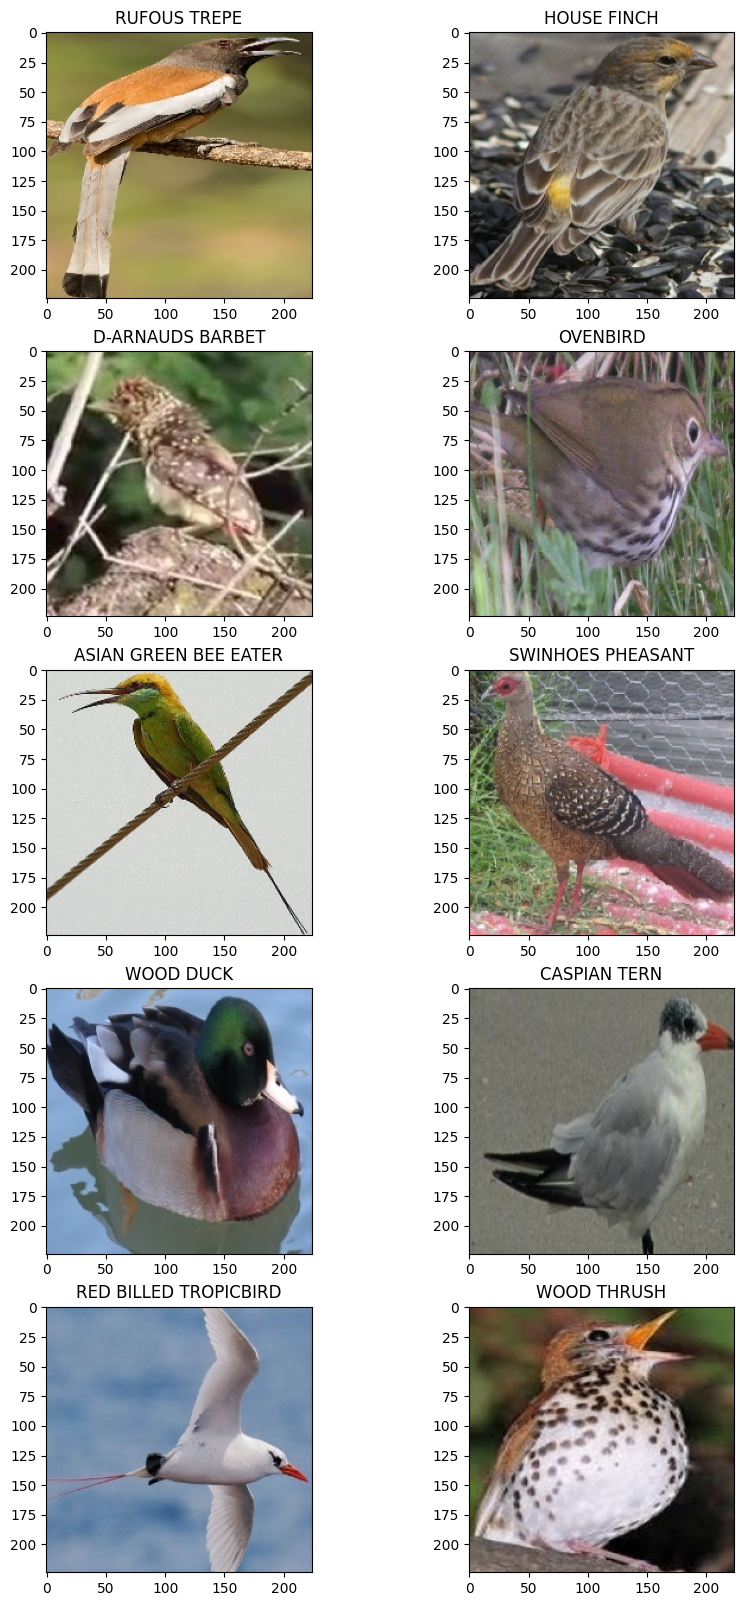

In [ ]:
images10 = pd.DataFrame(columns=['Direccion imagen', 'Especie'])
plt.figure(figsize=(10,20))
for i in range(10):
  select = data_10_images[data_10_images.Especie == primeras_filas[i]]
  select = select.sample()[['Direccion imagen', 'Especie']]
  images10 = pd.concat([images10, select], ignore_index=True)
  imagen = cv2.cvtColor(cv2.imread(images10.loc[i,'Direccion imagen']), cv2.COLOR_BGR2RGB)
  plt.subplot(5,2,i+1)
  plt.title(images10.loc[i,'Especie'])
  plt.imshow(imagen)
plt.show()

#Histograma de las 10 imagenes anteriores

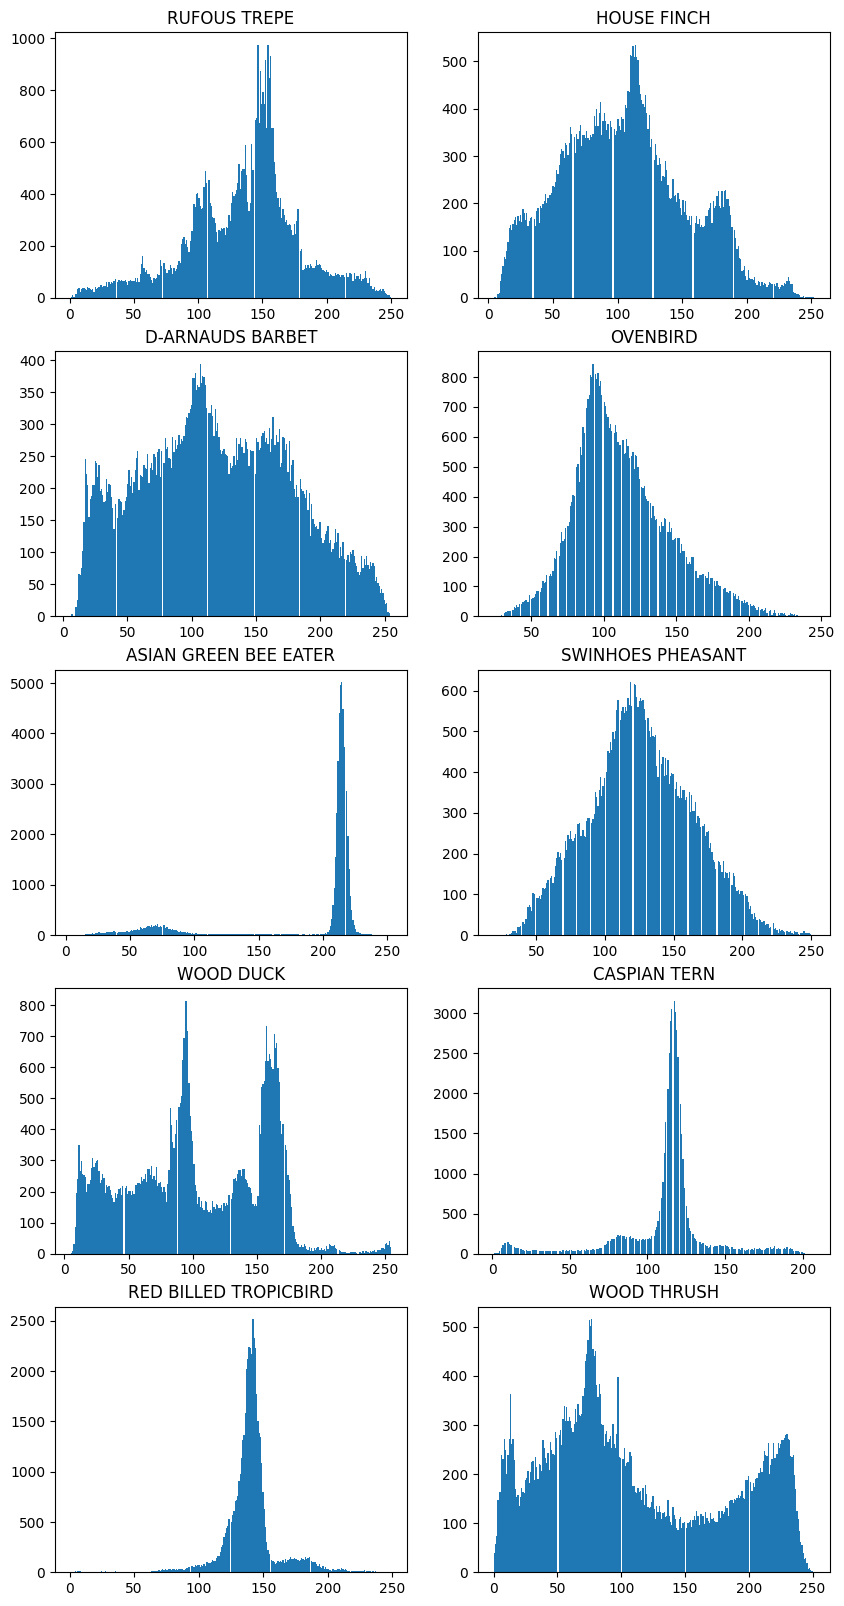

In [ ]:
plt.figure(figsize=(10,20))
for i in range(10):
  plt.subplot(5,2,i+1)
  imagen = cv2.cvtColor(cv2.imread(images10.loc[i,'Direccion imagen']), cv2.COLOR_BGR2GRAY)
  plt.title(images10.loc[i,'Especie'])
  plt.hist(imagen.flatten(), bins=256)
  del imagen
plt.show()

#Histograma en cada canal de las 10 imagenes (cada canal)

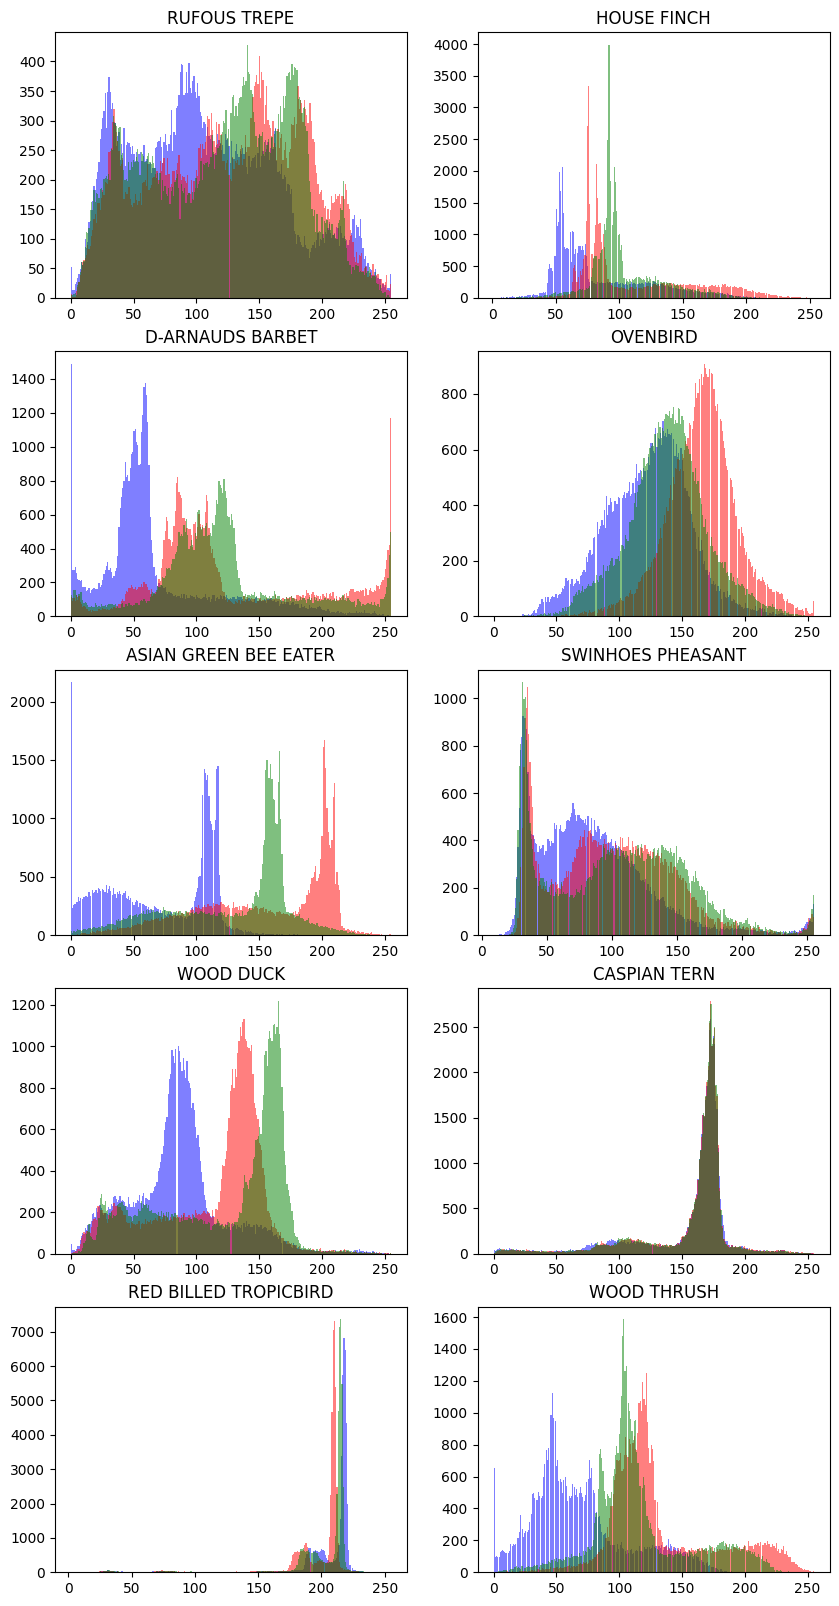

In [ ]:
plt.figure(figsize=(10,20))
for i in range(10):
  plt.subplot(5,2,i+1)
  imagen = cv2.cvtColor(cv2.imread(images10.loc[i,'Direccion imagen']), cv2.COLOR_BGR2RGB)
  plt.title(images10.loc[i,'Especie'])
  plt.hist(imagen[:,:,2].flatten(), bins=256, color='blue', alpha=0.5)
  plt.hist(imagen[:,:,0].flatten(), bins=256, color='red', alpha=0.5)
  plt.hist(imagen[:,:,1].flatten(), bins=256, color='green', alpha=0.5)
  del imagen
plt.show()

#Promedio de las imagenes (todas las imagenes)


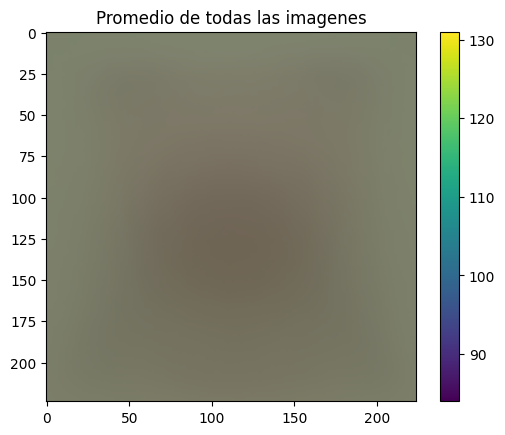

In [ ]:
imagenProm = cv2.cvtColor(cv2.imread('promedio_imagen.png'), cv2.COLOR_BGR2RGB)
plt.imshow(imagenProm)
plt.title('Promedio de todas las imagenes')
plt.show()
del imagenProm

# Promedio de las imagenes de cada especie (10 primeras)

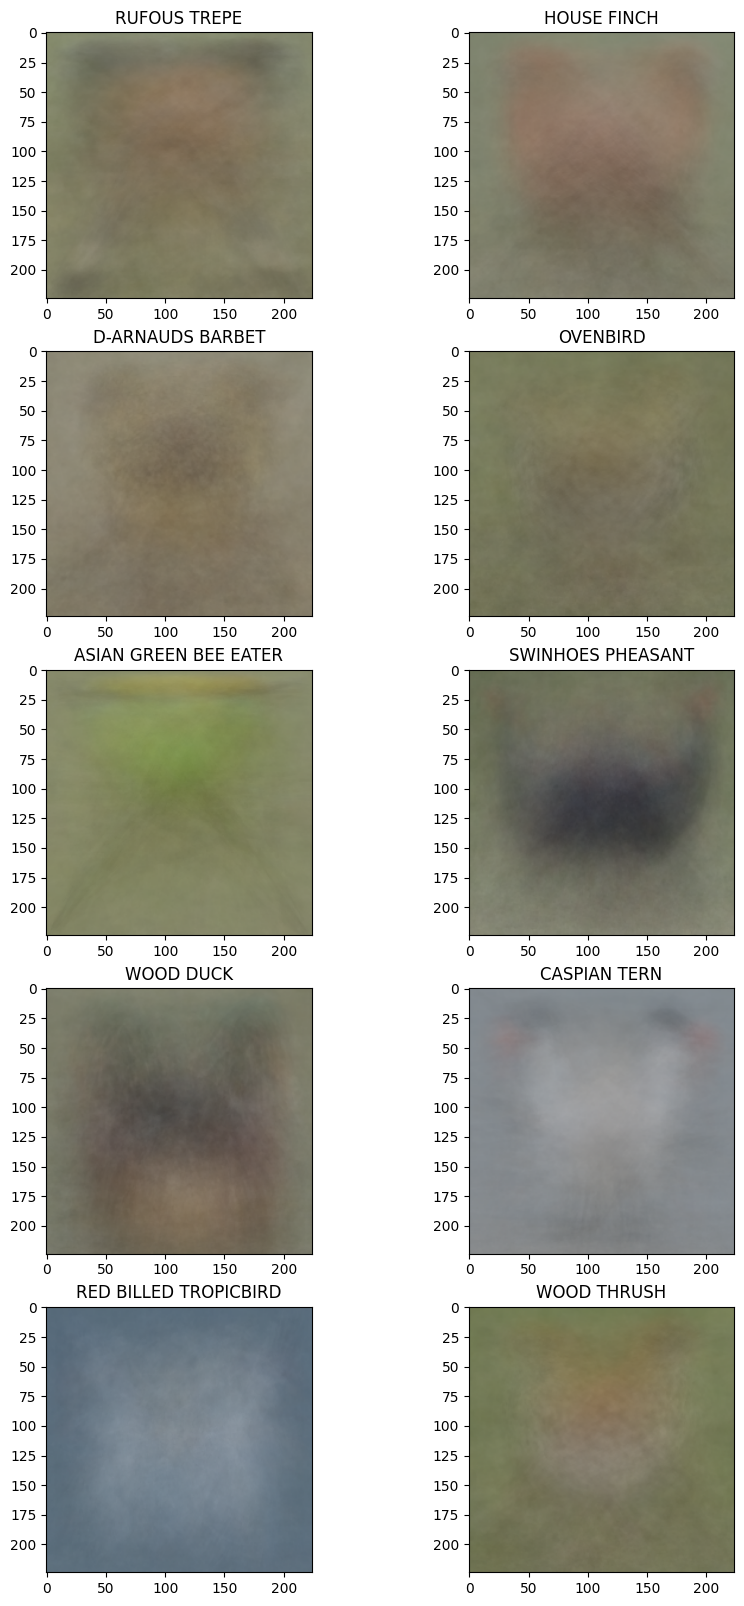

In [ ]:
plt.figure(figsize=(10,20))
for i in range(10):
  imagenes = []
  for dir in data_10_images[data_10_images.Especie == primeras_filas[i]]['Direccion imagen']:
    imagen = cv2.cvtColor(cv2.imread(dir), cv2.COLOR_BGR2RGB)
    imagenes.append(imagen)
    del imagen

  imagenes = np.array(imagenes)
  promedio = np.mean(imagenes, axis=0).astype(np.uint8)

  plt.subplot(5,2,i+1)
  plt.imshow(promedio)
  plt.title(primeras_filas[i])

  del imagenes
  del promedio

plt.show()

#Desviacion estandar de todas las imagenes de las primeras 10 especies

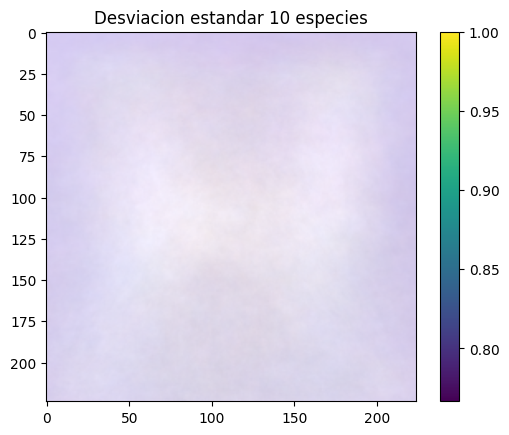

In [ ]:
imagenes = []
for dir in data_10_images['Direccion imagen']:
  imagen = cv2.cvtColor(cv2.imread(dir), cv2.COLOR_BGR2RGB)
  imagenes.append(imagen)
  del imagen

imagenes = np.array(imagenes)
desviacion = np.std(imagenes, axis=0)
desviacion = (desviacion/desviacion.max())

plt.imshow(desviacion)
plt.title('Desviacion estandar 10 especies')

del imagenes
del desviacion


# Desviacion estandar de las imagenes de cada especie (10 primeras)

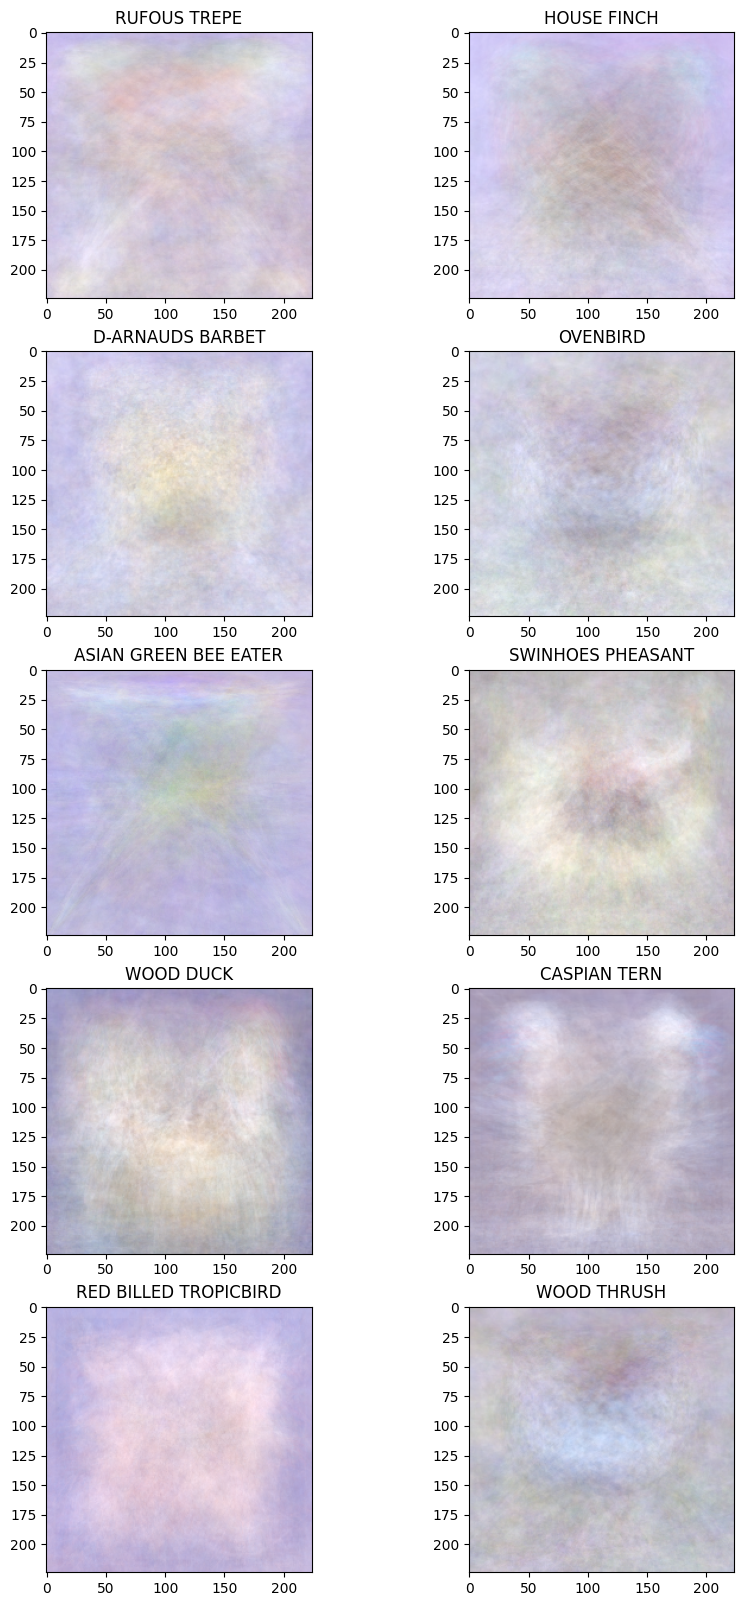

In [ ]:
plt.figure(figsize=(10,20))
for i in range(10):
  imagenes = []
  for dir in data_10_images[data_10_images.Especie == primeras_filas[i]]['Direccion imagen']:
    imagen = cv2.cvtColor(cv2.imread(dir), cv2.COLOR_BGR2RGB)
    imagenes.append(imagen)
    del imagen

  imagenes = np.array(imagenes)
  desviacion = np.std(imagenes, axis=0)
  desviacion = (desviacion/desviacion.max())

  plt.subplot(5,2,i+1)
  plt.imshow(desviacion)
  plt.title(primeras_filas[i])

  del imagenes
  del desviacion

plt.show()

#Grafica de barras de las 10 primeras especies

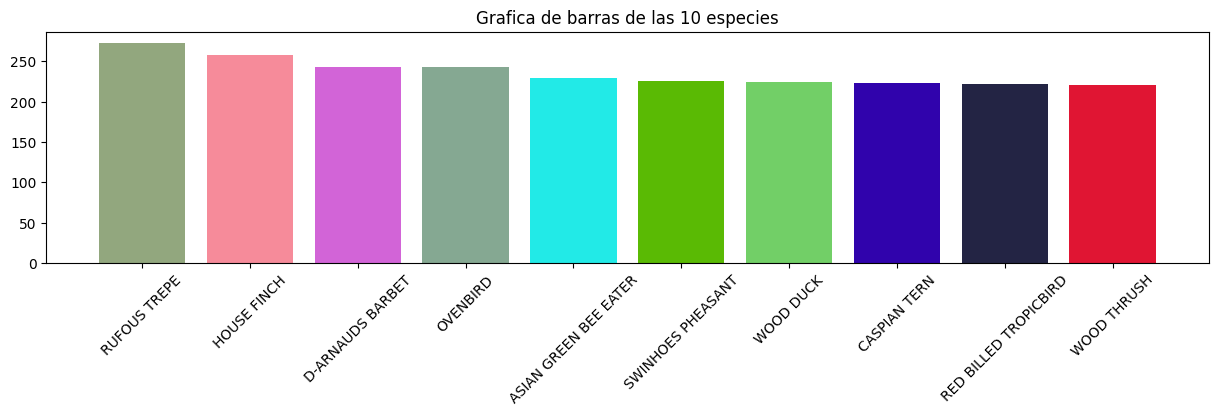

In [ ]:
count10 = conteo.head(10)

colores = np.random.rand(count10.shape[0], 3)

plt.figure(figsize=(15,3))
plt.bar(count10['Especie'], count10['Cantidad'], color=colores)
plt.title('Grafica de barras de las 10 especies')
plt.xticks(rotation=45)
plt.show()

#Grafico de torta de la cantidad de imagenes de las 10 primeras especies

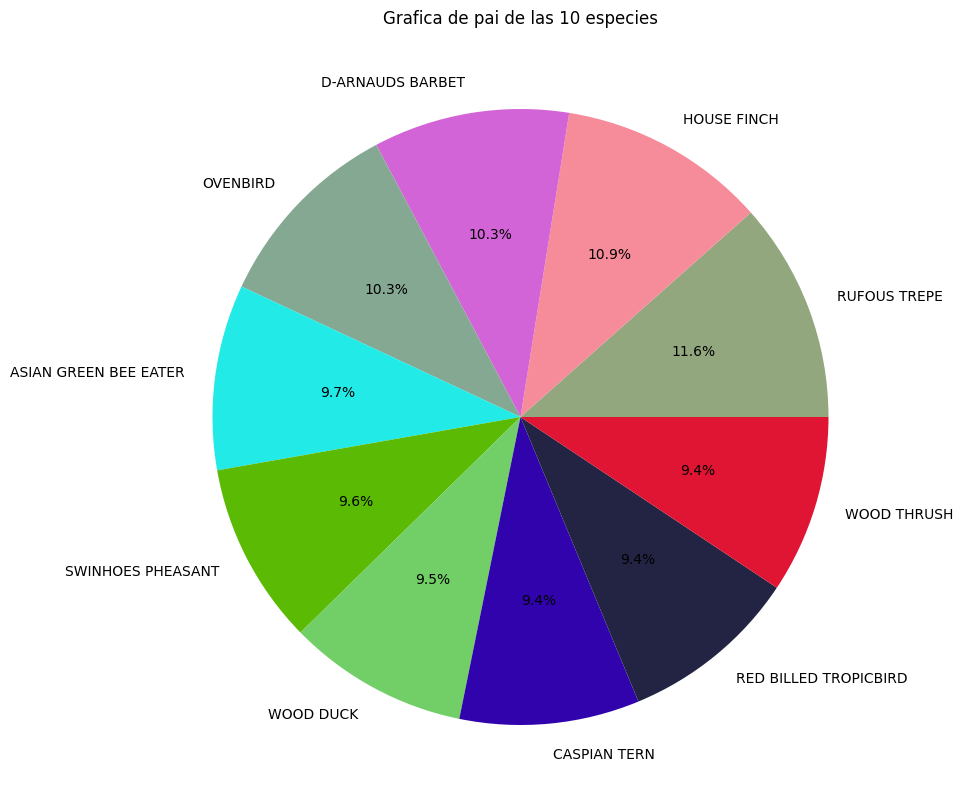

In [ ]:
plt.figure(figsize=(15,10))
plt.pie(count10['Cantidad'], labels=count10['Especie'], colors=colores, autopct='%1.1f%%')
plt.title('Grafica de pai de las 10 especies')
plt.show()

del colores
del count10